<img src='../../images/course_logo_2024.jpg'/>
<div dir="rtl">
    <h1 style="text-align: center;"> תירגול 4 רשתות נורונים מבוא</h1>
    <h1 style="text-align: center;"> Neural Network intuition</h1>
</div>

In [1]:
import graphviz
import numpy as np
from ipywidgets import interact, widgets
import pandas as pd
import torch
import numpy as np
import matplotlib.pyplot as plt



In [2]:
def gv(s): return graphviz.Source('digraph G{ rankdir="LR"' + s + '; }')

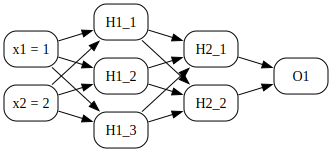

In [3]:
gv( """
    node [shape=box, style=rounded];

    // Input Layer
    I1 [label="x1 = 1", order=1];
    I2 [label="x2 = 2", order=2];

    // First Hidden Layer
    H1_1;
    H1_2;
    H1_3;

    // Second Hidden Layer
    H2_1;
    H2_2;

    // Output Layer
    O1;

    // Input to First Hidden
   //<<font color=red>0.5</font>>
    I1 -> H1_1;
    I1 -> H1_2;
    I1 -> H1_3;
    I2 -> H1_1;
    I2 -> H1_2;
    I2 -> H1_3;

    // First Hidden to Second Hidden
    H1_1 -> H2_1;
    H1_1 -> H2_2;
    H1_2 -> H2_1;
    H1_2 -> H2_2;
    H1_3 -> H2_1;
    H1_3 -> H2_2;

    // Second Hidden to Output
    H2_1 -> O1;
    H2_2 -> O1
""")


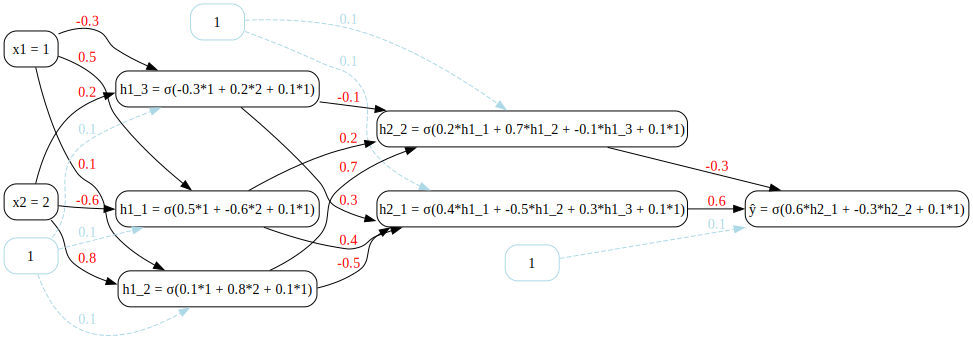

In [4]:
gv( """
    node [shape=box, style=rounded];

    // Input Layer
    I1 [label="x1 = 1", order=1];
    I2 [label="x2 = 2", order=2];
    I0  [label = 1, color=lightblue];

    // First Hidden Layer
    H10 [label="1",  color=lightblue];
    H1_1 [label="h1_1 = σ(0.5*1 + -0.6*2 + 0.1*1)"];
    H1_2 [label="h1_2 = σ(0.1*1 + 0.8*2 + 0.1*1)"];
    H1_3 [label="h1_3 = σ(-0.3*1 + 0.2*2 + 0.1*1)"];

    // Second Hidden Layer
    H2_1 [label="h2_1 = σ(0.4*h1_1 + -0.5*h1_2 + 0.3*h1_3 + 0.1*1)"];
    H2_2 [label="h2_2 = σ(0.2*h1_1 + 0.7*h1_2 + -0.1*h1_3 + 0.1*1)"];
    H2_0 [label="1",  color=lightblue];

    // Output Layer
    O1 [label="ŷ = σ(0.6*h2_1 + -0.3*h2_2 + 0.1*1)"];

    // Input to First Hidden
   //<<font color=red>0.5</font>>
    I0 -> H1_1 [style =dashed color=lightblue label= <<font color="lightblue">0.1</font>>]
    I0 -> H1_2 [style =dashed color=lightblue label= <<font color="lightblue">0.1</font>>]
    I0 -> H1_3 [style =dashed color=lightblue label= <<font color="lightblue">0.1</font>>]
    I1 -> H1_1 [label=<<font color="red">0.5</font>>];
    I1 -> H1_2 [label=<<font color="red">0.1</font>>];
    I1 -> H1_3 [label=<<font color="red">-0.3</font>>];
    I2 -> H1_1 [label=<<font color="red">-0.6</font>>];
    I2 -> H1_2 [label=<<font color="red">0.8</font>>];
    I2 -> H1_3 [label=<<font color="red">0.2</font>>];

    // First Hidden to Second Hidden
    H10 -> H2_1 [style =dashed color=lightblue label=<<font color="lightblue">0.1</font>>]
    H10 -> H2_2 [style =dashed color=lightblue label=<<font color="lightblue">0.1</font>>]
    H1_1 -> H2_1 [label=<<font color="red">0.4</font>>];
    H1_1 -> H2_2 [label=<<font color="red">0.2</font>>];
    H1_2 -> H2_1 [label=<<font color="red">-0.5</font>>];
    H1_2 -> H2_2 [label=<<font color="red">0.7</font>>];
    H1_3 -> H2_1 [label=<<font color="red">0.3</font>>];
    H1_3 -> H2_2 [label=<<font color="red">-0.1</font>>];

    // Second Hidden to Output
    H2_0 -> O1 [style =dashed color=lightblue label= <<font color="lightblue">0.1</font>>]
    H2_1 -> O1 [label=<<font color="red">0.6</font>>];
    H2_2 -> O1 [label=<<font color="red">-0.3</font>>]
""")

<div style='font-size: large;' align ='center'>Input and First Layer</div>

$$
\left[ \begin{array}{c} 1 & 2 & 1\end{array} \right]
\left[ \begin{array}{cccccc}
-0.3 & 0.5 & 0.1 \\
0.2 & -0.6 & 0.8 \\
0.1 & 0.1 & 0.1 \\
\end{array}\right] = \left[ \begin{array}{c} 0.2 & -0.6 & 1.8\end{array} \right]
$$
<div style='font-size: large;' align ='center'>Output of first layer and Second Layer</div>
<div style='font-size: xx-large;' align ='center'>↩️</div>
$$
\left[ \begin{array}{c} 0.2 & -0.6 & 1.8 & 1\end{array} \right]
\left[ \begin{array}{cccccc}
0.2 & 0.4  \\
0.7 & -0.5\\
-0.1 & 0.3\\
0.1 & 0.1\\
\end{array}\right] = \left[ \begin{array}{c} 0.46 & 1.02\end{array} \right]
$$
<div style='font-size: large;' align ='center'>Output of second layer and the Output Layer</div>
<div style='font-size: xx-large;' align ='center'>↩️</div>
$$
\left[ \begin{array}{c} 0.46 & 1.02 & 1\end{array} \right]
\left[ \begin{array}{cccccc}
0.6\\
-0.3\\
0.1\\
\end{array}\right] = \left[ \begin{array}{c} 0.07\end{array} \right]
$$


In [78]:


# Define the left matrix (3x1)
input_layer = np.array([[1], [2], [1]])

# Define the right matrix (3x3)
layer_one = np.array([
    [-0.3, 0.5, 0.1],
    [0.2, -0.6, 0.8],
    [0.1, 0.1, 0.1]
])

# Perform matrix multiplication
result = np.dot(input_layer.T, layer_one)

print(result)

[[ 0.2 -0.6  1.8]]


In [79]:


# Define the left matrix (3x1)
layer_one_output = np.array([[0.2], [-0.6], [1.8], [1]])

# Define the right matrix (3x3)
layer_two = np.array([
    [0.2, 0.4],
    [0.7, -0.5],
    [-0.1, 0.3],
    [0.1, 0.1],
   
])

# Perform matrix multiplication
result = np.dot(layer_one_output.T, layer_two)

print(result)

[[-0.46  1.02]]


In [95]:


# Define the left matrix (3x1)
layer_two_output = np.array([[0.46], [1.02], [1]])

# Define the right matrix (3x3)
output_layer = np.array([
    [0.6],
    [-0.3],
    [0.1],
   
])

# Perform matrix multiplication
result = np.dot(layer_two_output.T, output_layer)

print(result)

[[0.07]]


## Activation Function?

# $g(z) = \frac{1}{1+e^{-z}}\tag{1}$

In [8]:
df = pd.DataFrame({ 'x': [0,1,2,3,4,5], 'y': [0, 0 ,0, 1, 1, 1]})
x_train = df['x'].values
y_train = df['y'].values
x_train = x_train.reshape(-1,1)


In [9]:
g = lambda z: 1/(1+np.exp(-z))

In [10]:

@interact(w=(0.0,1,0.01), b=(-10, 10, 0.1))
def h1(w=0, b=0):
    z = lambda x: x*w + b

    
    # Create a figure and axis
    fig, ax = plt.subplots(figsize=(12, 6))

    x_res = np.arange(-10,10,0.05)
    gz = g(z(x_res))
    filter = np.round(gz,1) == 0.5
    x_ = x_res[filter][0]
    try:
        # Draw blue rectangle on the left side
        blue_rectangle = plt.Rectangle((x_, 0), -10, 1, color='lightblue', alpha=0.3)
        ax.add_patch(blue_rectangle)
        
        # Draw orange rectangle on the right side
        orange_rectangle = plt.Rectangle((x_, 0), 10, 1, color='red', alpha=0.3)
        ax.add_patch(orange_rectangle)
    except:
        pass
    
    # Create the scatter plot
    plt.scatter(x_train[y_train == 1], y_train[y_train == 1], marker='x', label='y=1', s = 50)
    plt.scatter(x_train[y_train == 0], y_train[y_train == 0], marker='o', label='y=0', s = 50)
    
    plt.plot(x_res, z(x_res), color='lightblue', linestyle='--', label='Linear Regression')
    plt.plot(x_res, g(z(x_res)), color='darkblue', linestyle='--', label='Logistic Regression')


    # Set labels and title
    plt.xlabel('Z')
    plt.ylabel('G')
    plt.title('Logistic Regression classification one variable')
    
    plt.ylim(-0.1,1.1)
    # Show legend
    plt.legend()
    
    # Show the plot
    plt.show()

interactive(children=(FloatSlider(value=0.0, description='w', max=1.0, step=0.01), FloatSlider(value=0.0, desc…

## Torch and derivatives
https://docs.google.com/presentation/d/e/2PACX-1vTbi5gKvG0cGmWVu147rs7PCvrO_kxIF2CmyQ89k4cSGvqvUZo8XPdZNclsUcRd98nCk9bZNduxn9Da/pub?start=false&loop=false&delayms=3000

In [11]:
x = torch.arange(5, dtype=float, requires_grad=True)  # input tensor
w = 2
b = 1


In [12]:
x

tensor([0., 1., 2., 3., 4.], dtype=torch.float64, requires_grad=True)

In [13]:
z1 = x * w + b

In [14]:
z2 = z1 ** 2

In [15]:
first_derivative = torch.autograd.grad(z2[2], x, create_graph=True)[0]
# We now have dloss/dx
second_derivative = torch.autograd.grad(first_derivative[2], x)[0]
# This computes d/dx(dloss/dx) = d2loss/dx2

In [16]:
first_derivative

tensor([ 0.,  0., 20.,  0.,  0.], dtype=torch.float64, grad_fn=<MulBackward0>)

In [17]:
second_derivative

tensor([0., 0., 8., 0., 0.], dtype=torch.float64)

In [18]:
z2

tensor([ 1.,  9., 25., 49., 81.], dtype=torch.float64, grad_fn=<PowBackward0>)

In [19]:
z1

tensor([1., 3., 5., 7., 9.], dtype=torch.float64, grad_fn=<AddBackward0>)

In [137]:
import numpy as np
import torch

# Create a NumPy array
numpy_array = np.array([[1, 2, 3],
                        [4, 5, 6]])

# Convert NumPy array to PyTorch tensor
torch_tensor = torch.tensor(numpy_array)

# Print the converted tensor
print(torch_tensor)

tensor([[1, 2, 3],
        [4, 5, 6]])


In [138]:
# Define the left matrix (3x1)
input_matrix = np.array([[1, 2, 1]])
input_matrix = torch.tensor(input_matrix).to(torch.float64)
# Define the right matrix (3x3)
layer_one = np.array([
    [-0.3, 0.5, 0.1],
    [0.2, -0.6, 0.8],
    [0.1, 0.1, 0.1]
])

# Define Layer two
layer_two = np.array([
    [0.2, 0.4],
    [0.7, -0.5],
    [-0.1, 0.3],
    [0.1, 0.1],
   
])

# Define output layer
output_layer = np.array([
    [0.6],
    [-0.3],
    [0.1],
   
])

layer_one = torch.tensor(layer_one, requires_grad=True)
layer_two = torch.tensor(layer_two, requires_grad=True)
output_layer = torch.tensor(output_layer,  requires_grad=True)


In [139]:

# Compute the dot product
input_layer_one = input_matrix @ layer_one



In [140]:

output_layer_1 = torch.cat((input_layer_one, torch.tensor([1]).unsqueeze(0)), dim=1)


In [141]:
output_layer_2 = output_layer_1 @ layer_two

In [142]:
output_layer_2 = torch.cat((output_layer_2, torch.tensor([1]).unsqueeze(0)), dim=1)


In [143]:
prediction = output_layer_2 @ output_layer


In [144]:
actsual = 2

In [145]:
delta = (torch.abs(prediction-actsual)).mean()

In [146]:
delta.backward()

In [147]:
with torch.no_grad(): 
    output_layer_derivative = output_layer.grad
    layer_two_derivatives = layer_two.grad
    layer_one_derivative = layer_one.grad

In [148]:
output_layer_derivative

tensor([[ 0.4600],
        [-1.0200],
        [-1.0000]], dtype=torch.float64)

In [149]:
layer_two_derivatives

tensor([[-0.1200,  0.0600],
        [ 0.3600, -0.1800],
        [-1.0800,  0.5400],
        [-0.6000,  0.3000]], dtype=torch.float64)

In [150]:
layer_one_derivative

tensor([[ 0.0000, -0.5700,  0.1500],
        [ 0.0000, -1.1400,  0.3000],
        [ 0.0000, -0.5700,  0.1500]], dtype=torch.float64)